# Lending Club Case Study

In this module you’ll be learning data visualisation with the help of a case study. This will enable you to understand how visualisation aids you in solving business problems. 

**Problem Statement**

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
1.  `If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company`
2. `If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company`

 
The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.


When a person applies for a loan, there are two types of decisions that could be taken by the company:
1. Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:
    - Fully paid: Applicant has fully paid the loan (the principal and the interest rate)
    - Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
    - Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 
2. Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

#### Objective:

The company wants to identify the driving factors which influences the loan applicants defaulting the loan so that the company can utilize this information for risk assement and cutting down the credit loss.

In [75]:
# Importing all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
# Loading the csv file into a dataframe and printing top 5 rows
loan_df = pd.read_csv('loan.csv', low_memory=False)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [77]:
#Check the shape of the dataframe
loan_df.shape

(39717, 111)

#### No. of rows = 39717
#### No. of columns = 111

In [78]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


## Data Cleansing

### Removing all the variables which are related to customer behaviour as these were not available at the time of loan application approval process.

In [157]:
loan_df_cleansed = loan_df.copy(deep=True)

In [158]:
type(loan_df_cleansed)

pandas.core.frame.DataFrame

In [159]:
customer_behaviour_variables = [ 'application_type', 'collection_recovery_fee', 'delinq_2yrs', 'earliest_cr_line', 
                                'inq_last_6mths', 'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d',                                
                                'open_acc', 'out_prncp', 'out_prncp_inv', 'pub_rec', 'recoveries', 'revol_bal', 'revol_util', 
                                'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee']


loan_df_cleansed.drop(customer_behaviour_variables, axis=1, inplace=True)

In [160]:
loan_df_cleansed.shape

(39717, 91)

In [161]:
# The ones marked 'current' are neither fully paid nor defaulted. So, get rid of variables belonging to current loan.




In [162]:
# Check for null values in columns
loan_df_cleansed.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 91, dtype: int64

#### We could notice that some of the columns only have NA for all the rows. For example, 'tot_hi_cred_lim', 'total_bc_limit'.So, we can drop all such columns

In [163]:
# Dropping all the columns which have only NA values in all rows

max_nulls_or_nas = 39717

loan_df_cleansed = loan_df_cleansed.loc[:, (loan_df_cleansed.isnull().sum() < max_nulls_or_nas)]
loan_df_cleansed.shape

(39717, 37)

#### After dropping all columns which had only only NA in all rows, the dataframe has 39717 rows & 37 columns

In [164]:
#Check the datatypes of all the columns of the dataframe
loan_df_cleansed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [165]:
#Check the number of null values in the columns
loan_df_cleansed.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
mths_since_last_delinq        25682
mths_since_last_record        36931
initial_list_status         

In [166]:
loan_df_cleansed.nunique(axis=0)

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
mths_since_last_delinq           95
mths_since_last_record          111
initial_list_status         

In [167]:
# Dropping all columns which have only 1 unique value across all rows in the dataset

loan_df_cleansed = loan_df_cleansed.loc[:, (loan_df_cleansed.nunique(axis=0) > 1)]

In [168]:
loan_df_cleansed.shape

(39717, 29)

In [169]:
# Dropping other redundant columns like member_id, emp_title, url, desc, title

loan_df_cleansed.drop(['member_id', 'emp_title', 'url', 'desc', 'title'], axis=1, inplace=True)

In [170]:
loan_df_cleansed.shape

(39717, 24)

In [171]:
loan_df_cleansed.isnull().sum()

id                            0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
mths_since_last_delinq    25682
mths_since_last_record    36931
total_rec_prncp               0
next_pymnt_d              38577
pub_rec_bankruptcies        697
dtype: int64

In [172]:
# Dropping columns which have a lot of missing values
# mths_since_last_delinq has around 65% missing values, mths_since_last_record - around 93% and next_pymnt_d - around 97%           

loan_df_cleansed.drop(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'], axis=1, inplace=True)

In [173]:
loan_df_cleansed.shape

(39717, 21)

In [174]:
loan_df_cleansed.isnull().sum()

id                         0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
total_rec_prncp            0
pub_rec_bankruptcies     697
dtype: int64

In [180]:
loan_df_cleansed.emp_length.value_counts()            

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [181]:
loan_df_cleansed.pub_rec_bankruptcies.value_counts()   

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [188]:
# Drop all the records with loan_status = current
loan_df_cleansed = loan_df_cleansed[loan_df_cleansed['loan_status'] != 'Current']
loan_df_cleansed.shape

(38577, 21)

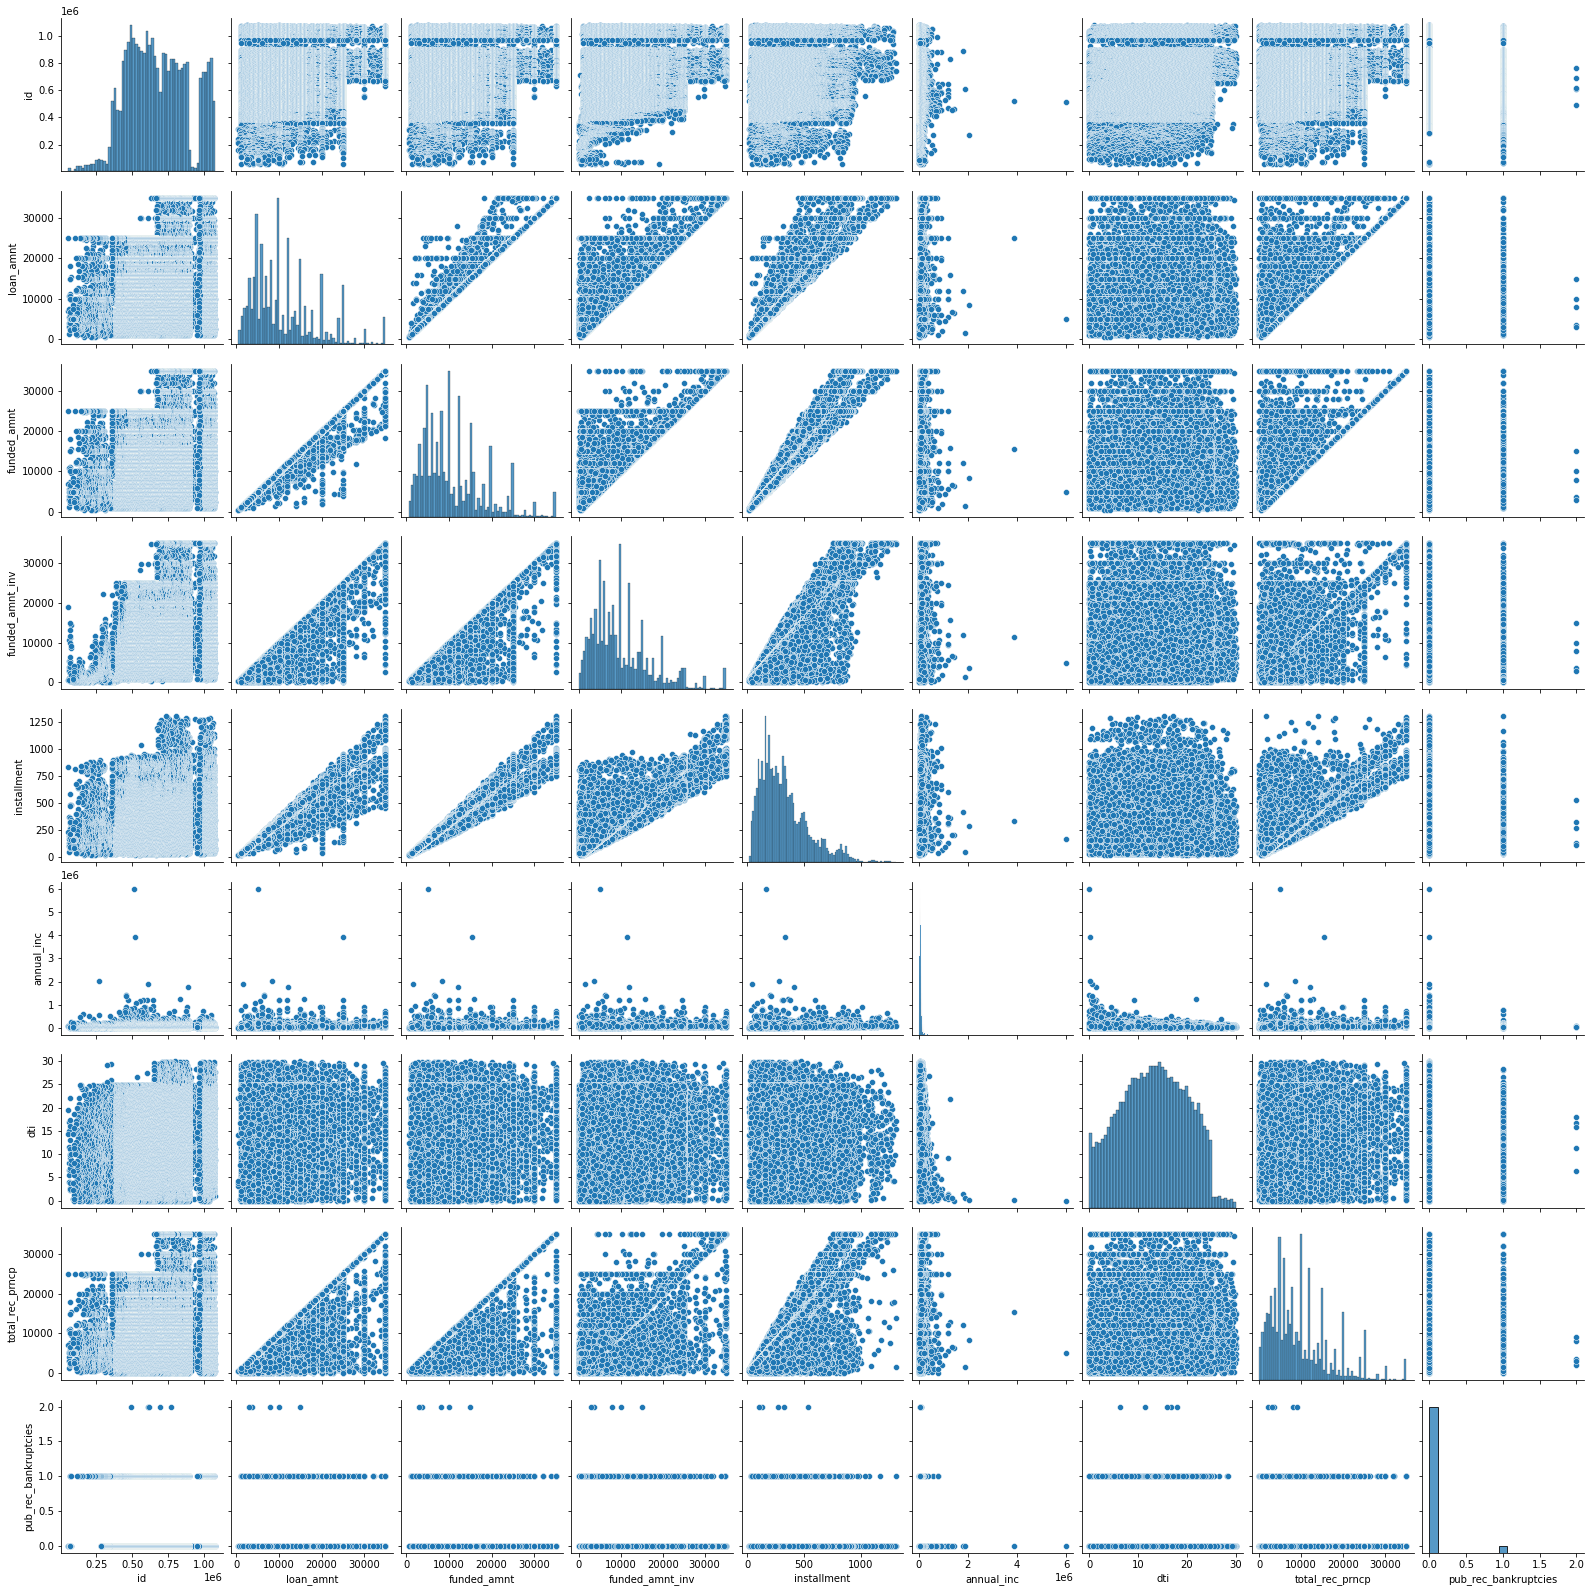

In [189]:
sns.pairplot(loan_df_cleansed)

In [175]:
loan_df_cleansed.describe().apply(lambda s:s.apply(lambda x: format(x, 'f')))

,id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,total_rec_prncp,pub_rec_bankruptcies
count,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39020.000000
mean,683131.913060,11219.443815,10947.713196,10397.448868,324.561922,68968.926377,13.315130,9793.348813,0.043260
std,210694.132915,7456.670694,7187.238670,7128.450439,208.874874,63793.765790,6.678594,7065.522127,0.204324
min,54734.000000,500.000000,500.000000,0.000000,15.690000,4000.000000,0.000000,0.000000,0.000000
25%,516221.000000,5500.000000,5400.000000,5000.000000,167.020000,40404.000000,8.170000,4600.000000,0.000000
50%,665665.000000,10000.000000,9600.000000,8975.000000,280.220000,59000.000000,13.400000,8000.000000,0.000000
75%,837755.000000,15000.000000,15000.000000,14400.000000,430.780000,82300.000000,18.600000,13653.260000,0.000000
max,1077501.000000,35000.000000,35000.000000,35000.000000,1305.190000,6000000.000000,29.990000,35000.020000,2.000000


In [176]:
## Removing Outliers

In [177]:
## Removing Rows with nulls values

In [178]:
## Analyzing relationships between variables

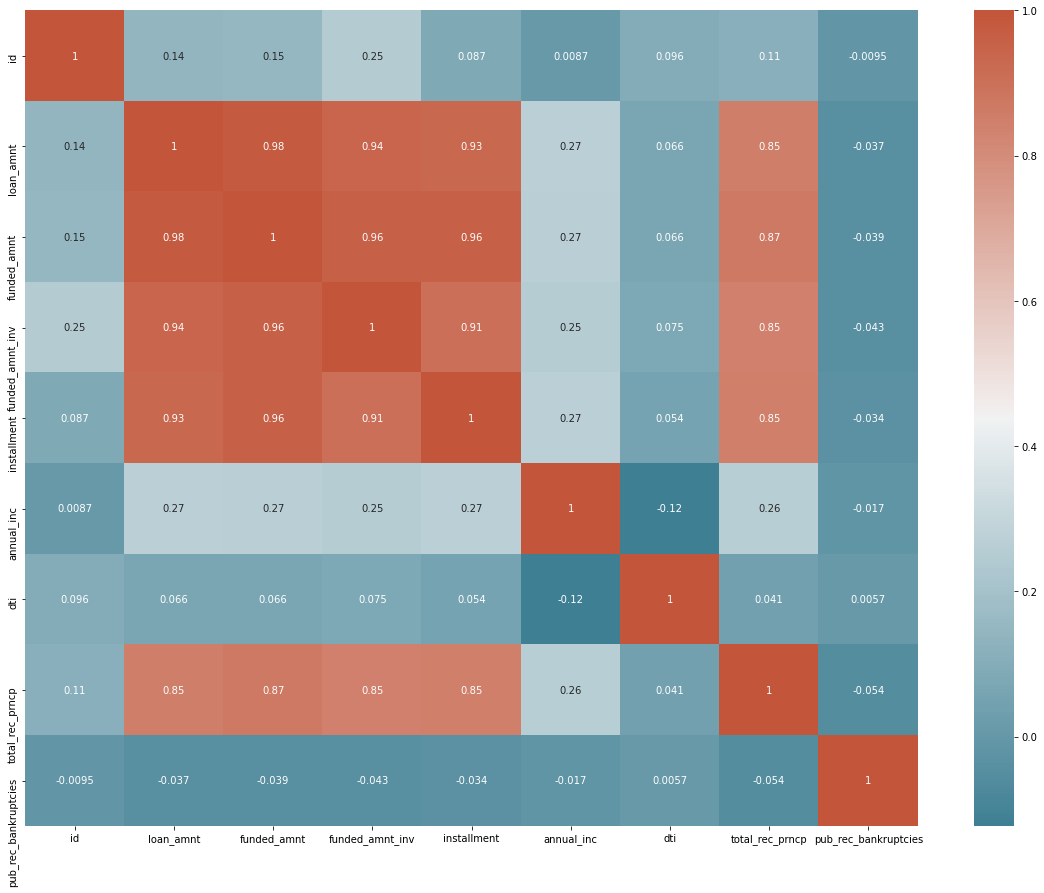

In [179]:
# Calculate correlation matrix

corr = loan_df_cleansed.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220,20, as_cmap=True))
plt.show()